In [1]:
using StatsBase
using Statistics
using Plots
using DifferentialEquations

In [2]:
function colonisation(p, param, t)
    dp_dt = (param.c*(param.h-p)*p)-(param.e*p)
    return(dp_dt)
end

colonisation (generic function with 1 method)

In [37]:
# Defining the total patches number, the extinction rate, and the colonization rate
param = (h=50.0, e=0.2, c=0.5) ### REVOIR h=1??

# Defining the time lapse t0 - t end
t=(0., 40.)

# Defining the proportion of initial occupied patches
#p=0.1

# Generating the varations of the proportion of the occupied patches
dp_dt_vec = zeros(Float64, 101)
p_vec = 0.00:0.01:1.0

0.0:0.01:1.0

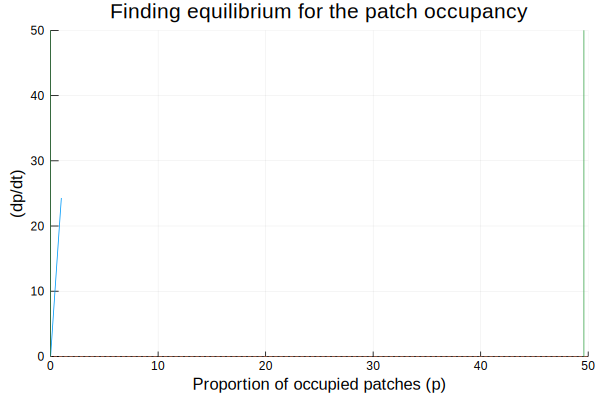

In [43]:
for i in 1:101
    dp_dt_vec[i] = colonisation(p_vec[i], param, t)
    #println(p_vec[i])
    #println(dp_dt_vec[i])
end

# Plotting the (dp/dt) in function of p(t) graph 
plot(p_vec, dp_dt_vec, title="Finding equilibrium for the patch occupancy", xlabel="Proportion of occupied patches (p)", ylabel="(dp/dt)", legend =false, xlim=(0,50), ylim=(0,50))

# Adding horizontal line where dp/dt = 0
hline!([0], ls=:dash)

# Adding vertical line for the values of p where the equilibrum should be reach
vline!([0, param.h-(param.e/param.c)])

In [41]:
param.h-(param.e/param.c)

49.6

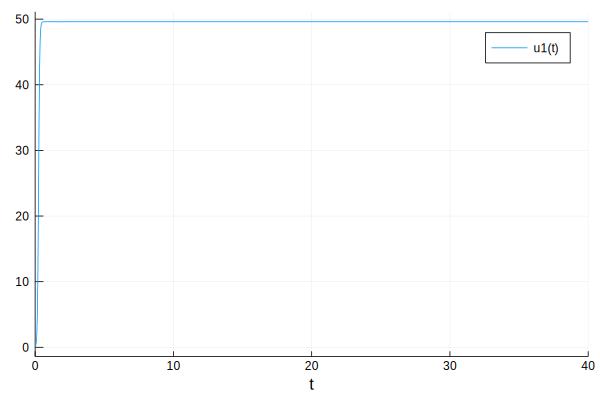

In [39]:
prob = ODEProblem(colonisation, 0.1, t, param)
#x = colonisation(0.1, param,t)
#typeof(prob)
sol = solve(prob)
plot(sol)

In [6]:
function P_colonisation(c, occupied_neighbors)
    return 1.0-((1.0-c)^occupied_neighbors)
end

P_colonisation (generic function with 1 method)

In [26]:
function initial_landscape!(landscape, initial_occupancy)
    
    # total number of patches
    h = prod(size(landscape)) 
    
    # initial population size depending on the occupancy
    initial_populations = convert(Int64, ceil(h*initial_occupancy))
    println(initial_populations)
    
    
    # defining the numbers associated with the patches initially occupied (in count of initial_populations) from all patches (1:h)
    # sample is giving the numbers in columns
    initially_occupied = sample(1:h, initial_populations, replace=false)
    print(initially_occupied)
    #changing the sampled patches to true
    for patch in initially_occupied
        landscape[patch] = true
    end
end

initial_landscape! (generic function with 1 method)

In [90]:
n_row = 5:7
n_col = 2:4
sum(landscape[n_row, n_col])

9

In [8]:
# Calculates how many patches are occupied arround the one we are looking to (row_id, col_id). The patche itself counts as an occupied neighbors
function count_neighbors(landscape, row_id, col_id)
    min_row = max((row_id-1), 1)
    min_col = max((col_id-1), 1)
    max_row = min((row_id+1), size(landscape, 1))
    max_col = min((col_id+1), size(landscape, 2))
    n_row = min_row:max_row
    n_col = min_col:max_col
    #Returns the number of occupied neighbors
    return float(sum(landscape[n_row, n_col]))
end

count_neighbors (generic function with 1 method)

In [9]:
function one_timestep!(new_landscape, landscape, e, c)
    for row_id in 1:size(landscape, 1), col_id in 1:size(landscape, 2)
        # Number of occupied neighbors
        occupied_neighbors = count_neighbors(landscape, row_id, col_id)
        # Colonisation probability
        col_probability = P_colonisation(c, occupied_neighbors)
        # Colonisation + extinction
        if landscape[row_id, col_id]
            new_landscape[row_id, col_id] = rand() < (1-e)+e*col_probability
        else
            new_landscape[row_id, col_id] = rand() < col_probability
        end
    end
end

one_timestep! (generic function with 1 method)

In [23]:
function simulation(X, Y, initial_occupancy, e, c)

    landscape = zeros(Bool, (X,Y))
    new_landscape = similar(landscape)

    # Create starting population
    initial_landscape!(landscape, initial_occupancy)

    occupancy = zeros(Float64, 500)
    occupancy[1] = mean(landscape)

    for timestep in 2:length(occupancy)
        one_timestep!(new_landscape, landscape, e, c)
        landscape = new_landscape
        # Update occupancy
        occupancy[timestep] = mean(landscape)
        #println(occupancy[timestep])
    end

    return (occupancy, landscape)
end

simulation (generic function with 1 method)

In [30]:
simulation(1, 1, 0.1, param.e, param.c)

1
[1]

([1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Bool[0])

In [22]:
occupancy = zeros(Float64, 1000)
for i in length(occupancy)
    result = simulation(100, 50, 0.1, param.e, param.h)
    occupancy[i] = mean(result[1])
end


500
[1083, 2177, 4428, 1977, 1435, 2620, 210, 1699, 2828, 3374, 902, 2950, 369, 4216, 284, 2226, 2870, 3079, 2655, 1658, 3922, 4900, 963, 2030, 1102, 3593, 1356, 881, 408, 3829, 2310, 533, 2798, 1240, 4113, 4899, 2183, 3091, 3371, 61, 1781, 361, 4857, 3023, 4676, 1584, 4579, 2275, 2251, 3618, 821, 3738, 396, 3479, 2941, 3929, 1354, 1081, 4, 4867, 4940, 740, 3825, 562, 3909, 2282, 2690, 1062, 2515, 1179, 3500, 2771, 1643, 2424, 782, 1174, 2061, 1793, 3329, 1569, 1373, 2966, 2752, 642, 2431, 185, 964, 3771, 2143, 901, 725, 2924, 3325, 1914, 1464, 1726, 2967, 1058, 1811, 2461, 4230, 2393, 4635, 668, 3058, 4739, 899, 2807, 1375, 3981, 2145, 4492, 2088, 4722, 2107, 833, 4114, 2788, 891, 3328, 1510, 2801, 1341, 2059, 1704, 3009, 1259, 1553, 3679, 183, 4152, 933, 268, 3823, 4866, 291, 4280, 111, 584, 1986, 2904, 3245, 1796, 1169, 2491, 488, 4203, 2378, 2034, 3205, 3188, 4748, 3928, 4137, 427, 614, 639, 1295, 121, 3022, 2751, 3911, 2209, 3470, 2045, 861, 708, 4932, 1046, 2429, 3475, 3942, 1765

In [12]:
@time simulation(100, 50, 0.1, 0.05, 0.06)

e = 0.0:0.05:1.0
occupancy = zeros(Float64, length(e))
for (i, ext_rate) in enumerate(e)
    result = simulation(100, 50, 0.1, ext_rate, 0.12)
    occupancy[i] = mean(result[1])
end

[4853, 3783, 4448, 660, 4143, 1414, 4390, 1000, 1164, 2780, 3973, 3602, 3936, 4980, 1328, 2931, 3276, 1260, 2812, 4913, 99, 1812, 579, 938, 2416, 1961, 3224, 2312, 2650, 80, 3004, 296, 4378, 2886, 4039, 4211, 1148, 4722, 4321, 3438, 4779, 4828, 4126, 3928, 2088, 4546, 3699, 1051, 679, 2963, 3786, 2149, 4675, 3862, 1561, 866, 1292, 1485, 792, 1081, 4324, 393, 4771, 2128, 1847, 1923, 2768, 143, 4119, 4058, 452, 4173, 3371, 481, 4656, 567, 3029, 2017, 3048, 1669, 3592, 2247, 981, 926, 2461, 2154, 1934, 4936, 3131, 3957, 300, 3755, 4873, 3671, 4751, 2050, 130, 4201, 240, 1578, 3400, 36, 869, 4191, 4547, 1115, 4827, 835, 4398, 11, 2819, 4788, 278, 3267, 4881, 4692, 2664, 2973, 1722, 2753, 2054, 1573, 1963, 3771, 1633, 1979, 4696, 438, 2736, 212, 1431, 4034, 1852, 1567, 4304, 2551, 1773, 2857, 254, 906, 2399, 161, 606, 65, 2466, 2850, 142, 4837, 4616, 1400, 3222, 982, 708, 1362, 4905, 3966, 4279, 3158, 3404, 2474, 274, 4022, 4906, 3554, 891, 4693, 3292, 4440, 2765, 2431, 2680, 4150, 1545, 61

0.9996
0.9998
0.9994
0.9992
0.9994
0.9996
0.9998
0.9994
0.999
0.9988
0.9986
0.9998
0.9992
0.9992
0.9996
0.9998
0.9996
0.9998
0.999
0.9994
0.9996
0.999
0.9992
0.9998
1.0
1.0
0.9996
0.9992
0.9992
0.9998
0.9998
0.9998
0.9994
0.9992
0.9994
0.9992
0.999
0.9996
0.9996
0.9996
0.9996
0.9996
0.9994
0.9996
0.9998
0.9992
0.9998
0.9998
0.9994
0.9994
0.9992
0.9994
0.9994
1.0
0.9998
0.9996
0.9998
0.9998
1.0
0.9996
0.9996
0.9994
0.9998
1.0
0.9994
0.9998
0.9992
0.9998
0.9992
0.9996
0.9992
0.9996
0.9998
0.9992
0.9994
0.9996
0.9992
0.9992
0.9992
0.9988
0.9984
0.9994
0.9994
0.9992
0.9998
0.999
0.9996
0.999
0.9994
0.9992
0.9998
1.0
0.9996
0.9994
0.999
0.9994
0.9988
0.9996
0.9994
0.9984
0.9994
0.9992
0.9998
0.9996
0.9998
0.9996
0.9994
0.9988
0.999
0.9994
0.9992
0.9996
0.9994
0.9996
0.9994
0.9998
0.9996
0.9996
0.9992
0.9996
0.9996
0.9994
0.9996
0.9992
0.9998
0.9998
0.9994
0.9992
0.9998
  1.296003 seconds (5.08 M allocations: 459.122 MiB, 13.38% gc time)


MethodError: MethodError: Cannot `convert` an object of type StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}} to an object of type Float64
Closest candidates are:
  convert(::Type{T<:Number}, !Matched::T<:Number) where T<:Number at number.jl:6
  convert(::Type{T<:Number}, !Matched::Number) where T<:Number at number.jl:7
  convert(::Type{T<:Number}, !Matched::Base.TwicePrecision) where T<:Number at twiceprecision.jl:250
  ...

In [2]:
# NOTE
# 1. la parcelle se colonise elle-même
# 2. chaque voisin peut coloniser vs. un pool de propagules global

function initial_landscape!(landscape, initial_occupancy)
    S = prod(size(landscape))
    initial_populations = convert(Int64, ceil(S*initial_occupancy))
    initially_occupied = sample(1:S, initial_populations, replace=false)
    for patch in initially_occupied
        landscape[patch] = true
    end
end


function count_neighbors(landscape, row_id, col_id)
    min_row = max((row_id-1), 1)
    min_col = max((col_id-1), 1)
    max_row = min((row_id+1), size(landscape, 1))
    max_col = min((col_id+1), size(landscape, 2))
    n_row = min_row:max_row
    n_col = min_col:max_col
    return float(sum(landscape[n_row, n_col]))
end

function one_timestep!(new_landscape, landscape, ϵ, c)
    for row_id in 1:size(landscape, 1), col_id in 1:size(landscape, 2)
        # Number of occupied neighbors
        occupied_neighbors = count_neighbors(landscape, row_id, col_id)
        # Colonisation probability
        col_probability = P_colonisation(c, occupied_neighbors)
        # Colonisation + extinction
        if landscape[row_id, col_id]
            new_landscape[row_id, col_id] = rand() < (1-ϵ)+ϵ*col_probability
        else
            new_landscape[row_id, col_id] = rand() < col_probability
        end
    end
end

function simulation(X, Y, initial_occupancy, ϵ, c)

    landscape = zeros(Bool, (X,Y))
    new_landscape = similar(landscape)

    # Create starting population
    initial_landscape!(landscape, 0.1)

    occupancy = zeros(Float64, 1000)
    occupancy[1] = mean(landscape)

    for timestep in 2:length(occupancy)
        one_timestep!(new_landscape, landscape, ϵ, c)
        landscape = new_landscape
        # Update occupancy
        occupancy[timestep] = mean(landscape)
    end

    return (occupancy, landscape)
end

@time simulation(100, 50, 0.1, 0.05, 0.06)

ϵ = 0.0:0.05:1.0
occupancy = zeros(Float64, length(ϵ))
for (i, ext_rate) in enumerate(ϵ)
    result = simulation(100, 50, 0.1, ext_rate, 0.12)
    occupancy[i] = mean(result[1])
end


  1.043643 seconds (5.13 M allocations: 464.070 MiB, 5.55% gc time)
